In [619]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib


## READING DATA

In [620]:
df2=pd.read_csv('dataset/01_District_wise_crimes_committed_IPC_2001_2012.csv')

In [621]:
df2.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [622]:
df2.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

## EDA

In [623]:
df=df2.drop(columns='OTHER RAPE')
df=df.drop(columns='KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS')
df=df.drop(columns='KIDNAPPING AND ABDUCTION OF OTHERS')

In [624]:
df.isna().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
KIDNAPPING & ABDUCTION                                 0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                                             0
OTHER THEFT                                            0
RIOTS                                                  0
CRIMINAL BREACH OF TRUST       

In [625]:
df.shape

(9029, 30)

In [626]:
df['TOTAL IPC CRIMES'].max()

220335

In [627]:
df=df.drop(columns=['AUTO THEFT', 'OTHER THEFT'])

In [628]:
crime_columns=[ 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE',
       'KIDNAPPING & ABDUCTION', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING', 'COUNTERFIETING',
       'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
       'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES']

In [629]:
df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI UT', 'LAKSHADWEEP', 'PUDUCHERRY'],
      dtype=object)

In [630]:
df[df['STATE/UT']=='DELHI UT'].head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,KIDNAPPING & ABDUCTION,DACOITY,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
699,DELHI UT,CENTRAL DELHI,2001,29,42,4,28,0,62,3,...,1,113,4,30,7,2,0,13,1422,3750
700,DELHI UT,DELHI UT TOTAL,2001,547,510,63,381,0,1627,48,...,50,2011,113,502,90,138,0,432,22000,54384
701,DELHI UT,EAST DELHI,2001,56,51,15,24,0,163,4,...,4,257,11,56,11,27,0,23,1552,4447
702,DELHI UT,SHAHDARA,2001,56,51,15,26,0,166,4,...,4,259,11,56,11,27,0,2,1558,4453
703,DELHI UT,G.R.P.(RLY),2001,11,4,0,1,0,7,1,...,0,7,0,4,0,0,0,0,129,1630


In [631]:
df['DISTRICT'].value_counts()

TOTAL             408
G.R.P.             46
RAILWAYS           35
NORTH              25
SOUTH              25
                 ... 
RAILWAYS KMR        1
CRIME KASHMIR       1
G.R.P. AJMER        1
G.R.P. JODHPUR      1
CAR                 1
Name: DISTRICT, Length: 824, dtype: int64

In [632]:
df = df[df['DISTRICT'].apply(lambda x: "TOTAL" not in x)]
df.reset_index(drop=True, inplace=True) 

In [633]:
df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI UT', 'LAKSHADWEEP', 'PUDUCHERRY'],
      dtype=object)

In [634]:
state_name_mapping = {
    'A & N ISLANDS': 'Andaman and Nicobar Islands',
    'D & N HAVELI': 'Dadra and Nagar Haveli',
    'DAMAN & DIU': 'Daman and Diu',
    'DELHI UT': 'Delhi',
    'JAMMU & KASHMIR': 'Jammu and Kashmir'
}

df['STATE/UT'] = df['STATE/UT'].replace(state_name_mapping)

In [635]:
df['DISTRICT']=df['DISTRICT'].map(lambda x:x.lower())
df['STATE/UT']=df['STATE/UT'].map(lambda x:x.lower())

In [636]:
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,KIDNAPPING & ABDUCTION,DACOITY,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,andhra pradesh,adilabad,2001,101,60,17,50,0,46,9,...,30,1131,16,149,34,175,0,181,1518,4154
1,andhra pradesh,anantapur,2001,151,125,1,23,0,53,8,...,69,1543,7,118,24,154,0,270,754,4125
2,andhra pradesh,chittoor,2001,101,57,2,27,0,59,4,...,38,2088,14,112,83,186,0,404,1262,5818
3,andhra pradesh,cuddapah,2001,80,53,1,20,0,25,1,...,23,795,17,126,38,57,0,233,1181,3140
4,andhra pradesh,east godavari,2001,82,67,1,23,0,49,4,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8604,delhi,stf,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
8605,delhi,west delhi,2012,52,37,10,79,0,454,2,...,18,227,18,53,6,327,0,292,1144,5558
8606,lakshadweep,lakshadweep,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
8607,puducherry,karaikal,2012,5,6,2,6,0,2,0,...,1,186,0,2,0,1,0,44,392,787


In [637]:
df['DISTRICT'] = df['DISTRICT'].str.replace(r'[^a-zA-Z0-9]', '', regex=True)

In [638]:
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,KIDNAPPING & ABDUCTION,DACOITY,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,andhra pradesh,adilabad,2001,101,60,17,50,0,46,9,...,30,1131,16,149,34,175,0,181,1518,4154
1,andhra pradesh,anantapur,2001,151,125,1,23,0,53,8,...,69,1543,7,118,24,154,0,270,754,4125
2,andhra pradesh,chittoor,2001,101,57,2,27,0,59,4,...,38,2088,14,112,83,186,0,404,1262,5818
3,andhra pradesh,cuddapah,2001,80,53,1,20,0,25,1,...,23,795,17,126,38,57,0,233,1181,3140
4,andhra pradesh,eastgodavari,2001,82,67,1,23,0,49,4,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8604,delhi,stf,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
8605,delhi,westdelhi,2012,52,37,10,79,0,454,2,...,18,227,18,53,6,327,0,292,1144,5558
8606,lakshadweep,lakshadweep,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
8607,puducherry,karaikal,2012,5,6,2,6,0,2,0,...,1,186,0,2,0,1,0,44,392,787


In [639]:
df['STATE/UT']=df['STATE/UT'].str.replace(' ','')

In [640]:
df['DISTRICT'].value_counts()

grp           72
railways      35
north         25
south         25
hamirpur      24
              ..
kawardha       1
midnapur       1
delhil         1
viluppuram     1
car            1
Name: DISTRICT, Length: 801, dtype: int64

In [641]:
df['STATE/UT'].unique()

array(['andhrapradesh', 'arunachalpradesh', 'assam', 'bihar',
       'chhattisgarh', 'goa', 'gujarat', 'haryana', 'himachalpradesh',
       'jammuandkashmir', 'jharkhand', 'karnataka', 'kerala',
       'madhyapradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram',
       'nagaland', 'odisha', 'punjab', 'rajasthan', 'sikkim', 'tamilnadu',
       'tripura', 'uttarpradesh', 'uttarakhand', 'westbengal',
       'andamanandnicobarislands', 'chandigarh', 'dadraandnagarhaveli',
       'damananddiu', 'delhi', 'lakshadweep', 'puducherry'], dtype=object)

In [642]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'KIDNAPPING & ABDUCTION', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING', 'COUNTERFIETING',
       'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
       'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [643]:
df=df.drop(columns='TOTAL IPC CRIMES')

## SAFETY RANKING

In [644]:
weights = {
    "MURDER": 5,
    "ATTEMPT TO MURDER": 5,
    "CULPABLE HOMICIDE NOT AMOUNTING TO MURDER": 4.5,
    "RAPE": 5,
    'CUSTODIAL RAPE':5,
    "KIDNAPPING & ABDUCTION": 4.5,
    "DACOITY": 4.5,
    "PREPARATION AND ASSEMBLY FOR DACOITY": 4.5,
    "ROBBERY": 4.5,
    "BURGLARY": 1,
    "THEFT": 3.5,
    "RIOTS": 3,
    "CRIMINAL BREACH OF TRUST": 1,
    "CHEATING": 1.5,
    "COUNTERFIETING": 1,
    "ARSON": 3,
    "HURT/GREVIOUS HURT": 4.5,
    "DOWRY DEATHS": 2,
    "ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY": 5,
    "INSULT TO MODESTY OF WOMEN": 5,
    "CRUELTY BY HUSBAND OR HIS RELATIVES": 4,
    "IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES": 5,
    "CAUSING DEATH BY NEGLIGENCE": 3.5,
    "OTHER IPC CRIMES": 2.5,
}
df.iloc[:, 3:]

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,KIDNAPPING & ABDUCTION,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,...,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES
0,101,60,17,50,0,46,9,0,41,198,...,1,30,1131,16,149,34,175,0,181,1518
1,151,125,1,23,0,53,8,0,16,191,...,8,69,1543,7,118,24,154,0,270,754
2,101,57,2,27,0,59,4,0,14,237,...,9,38,2088,14,112,83,186,0,404,1262
3,80,53,1,20,0,25,1,0,4,98,...,2,23,795,17,126,38,57,0,233,1181
4,82,67,1,23,0,49,4,0,25,437,...,3,41,1244,12,109,58,247,0,431,2313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8604,0,1,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,1
8605,52,37,10,79,0,454,2,4,52,186,...,2,18,227,18,53,6,327,0,292,1144
8606,0,0,0,0,0,0,0,0,0,3,...,0,3,3,0,1,0,1,0,0,32
8607,5,6,2,6,0,2,0,1,3,21,...,1,1,186,0,2,0,1,0,44,392


In [645]:

df.iloc[:, 3:] = df.iloc[:, 3:].apply(pd.to_numeric, errors='coerce')

df.fillna(0, inplace=True)
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df.iloc[:, 3:])
normalized_df = pd.DataFrame(normalized_data, columns=df.columns[3:])

normalized_df['Weighted_Score'] = sum(normalized_df[col] * weight for col, weight in weights.items())

max_score = normalized_df['Weighted_Score'].max()
if max_score == 0:
    normalized_df['Safety_Index'] = 1  
else:
    normalized_df['Safety_Index'] = 1 - normalized_df['Weighted_Score'] / max_score

df['Safety_Index'] = normalized_df['Safety_Index']

# Rank districts
df['Rank'] = df['Safety_Index'].rank(ascending=False)

In [646]:
df['Rank'].unique()

array([7486., 7698., 7783., ...,  104., 1158., 4020.])

In [647]:
df['Rank'].max()

8609.0

In [648]:
df[df['Rank']>8585]

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,KIDNAPPING & ABDUCTION,DACOITY,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,Safety_Index,Rank
356,maharashtra,mumbai,2001,295,200,6,127,0,148,61,...,3845,18,274,44,198,0,709,6095,0.224683,8594.0
2428,maharashtra,mumbai,2004,253,127,4,187,0,178,42,...,3702,13,321,78,248,0,735,6451,0.247952,8591.0
3128,maharashtra,mumbai,2005,212,136,8,201,0,198,47,...,3731,9,385,99,336,0,658,7275,0.194576,8597.0
3828,maharashtra,mumbaicommr,2006,239,135,5,165,0,190,29,...,3797,17,357,102,327,1,778,7138,0.221800,8595.0
4418,karnataka,bangalorecommr,2007,246,264,7,62,1,119,41,...,2381,54,187,2,290,0,110,10969,0.314559,8587.0
4536,maharashtra,mumbaicommr,2007,230,116,2,174,0,179,31,...,3781,17,365,112,380,0,778,6862,0.245532,8592.0
5131,karnataka,bangalorecommr,2008,253,297,8,54,0,159,88,...,2497,52,179,1,307,0,126,10648,0.256608,8590.0
5252,maharashtra,mumbaicommr,2008,210,132,0,218,0,189,35,...,4155,11,436,121,502,0,709,6850,0.178065,8598.0
5862,karnataka,bangalorecommr,2009,256,338,1,65,0,270,41,...,2653,50,251,35,367,0,87,9992,0.165056,8599.0
5983,maharashtra,mumbaicommr,2009,217,160,6,182,0,149,39,...,3892,15,400,101,434,0,710,6738,0.211020,8596.0


In [649]:
data = df[['STATE/UT', 'DISTRICT', 'YEAR', 'Safety_Index']]

## FINAL MODEL

In [650]:
data

,STATE/UT,DISTRICT,YEAR,Safety_Index
0,andhrapradesh,adilabad,2001,0.800361
1,andhrapradesh,anantapur,2001,0.783363
2,andhrapradesh,chittoor,2001,0.772477
3,andhrapradesh,cuddapah,2001,0.858273
4,andhrapradesh,eastgodavari,2001,0.799454
...,...,...,...,...
8604,delhi,stf,2012,0.999384
8605,delhi,westdelhi,2012,0.743289
8606,lakshadweep,lakshadweep,2012,0.999033
8607,puducherry,karaikal,2012,0.982068


In [651]:

# Initialize label encoders
state_encoder = LabelEncoder()
district_encoder = LabelEncoder()

# Apply label encoding
data['State_Encoded'] = state_encoder.fit_transform(data['STATE/UT'])
data['District_Encoded'] = district_encoder.fit_transform(data['DISTRICT'])



C:\Users\Palak Bansal\AppData\Local\Temp\ipykernel_13952\563757034.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['State_Encoded'] = state_encoder.fit_transform(data['STATE/UT'])
C:\Users\Palak Bansal\AppData\Local\Temp\ipykernel_13952\563757034.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['District_Encoded'] = district_encoder.fit_transform(data['DISTRICT'])


In [652]:
data['State_Encoded'].unique()

array([ 1,  2,  3,  4,  6, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22,
       23, 24, 25, 27, 28, 29, 30, 31, 33, 32, 34,  0,  5,  7,  8,  9, 18,
       26])

In [653]:
data['District_Encoded'].max()

800

In [654]:
data

,STATE/UT,DISTRICT,YEAR,Safety_Index,State_Encoded,District_Encoded
0,andhrapradesh,adilabad,2001,0.800361,1,3
1,andhrapradesh,anantapur,2001,0.783363,1,28
2,andhrapradesh,chittoor,2001,0.772477,1,154
3,andhrapradesh,cuddapah,2001,0.858273,1,172
4,andhrapradesh,eastgodavari,2001,0.799454,1,221
...,...,...,...,...,...,...
8604,delhi,stf,2012,0.999384,9,709
8605,delhi,westdelhi,2012,0.743289,9,791
8606,lakshadweep,lakshadweep,2012,0.999033,18,446
8607,puducherry,karaikal,2012,0.982068,26,373


In [655]:
data.to_csv('dataset/data.csv', index=False)

In [656]:
X = data[['State_Encoded', 'District_Encoded', 'YEAR']]
y = data['Safety_Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0),
    "RandomForest": RandomForestRegressor()
}

results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        "MSE": mse,
        "MAE": mae,
        "R2": r2
    }
    print(f"{name} - MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}\n")

# Determine the best model
best_model = min(results, key=lambda x: results[x]['MSE'])
print(f"Best Model: {best_model} with MSE = {results[best_model]['MSE']:.4f}")

# Test predictions using the best model
final_model = models[best_model]
y_pred_test = final_model.predict(X_test)
print(f"Predictions on Test Data: {y_pred_test}")


Training XGBoost...
XGBoost - MSE: 0.0034, MAE: 0.0300, R²: 0.6740

Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 301
[LightGBM] [Info] Number of data points in the train set: 6887, number of used features: 3
[LightGBM] [Info] Start training from score 0.892865
LightGBM - MSE: 0.0039, MAE: 0.0389, R²: 0.6284

Training CatBoost...
CatBoost - MSE: 0.0034, MAE: 0.0356, R²: 0.6737

Training RandomForest...
RandomForest - MSE: 0.0007, MAE: 0.0146, R²: 0.9353

Best Model: RandomForest with MSE = 0.0007
Predictions on Test Data: [0.96882961 0.87922556 0.78250552 ... 0.96608604 0.8719841  0.7979024 ]


In [657]:


# Prepare data
X = data[['State_Encoded', 'District_Encoded', 'YEAR']]
y = data['Safety_Index']

# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


## EVALUATION

In [658]:
model.predict([[26, 57, 2012]])

C:\Users\Palak Bansal\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.86544314])

In [659]:
y_pred = model.predict(X_test)

In [660]:

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 0.0146
Mean Squared Error (MSE): 0.0007
Root Mean Squared Error (RMSE): 0.0257
R-squared (R²): 0.9366


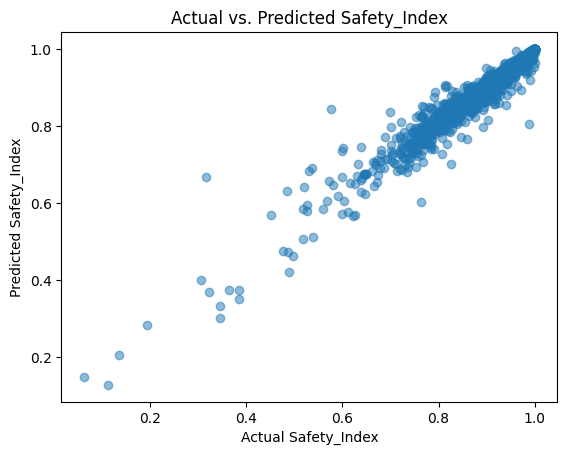

In [661]:

# Scatter plot of actual vs. predicted
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Safety_Index")
plt.ylabel("Predicted Safety_Index")
plt.title("Actual vs. Predicted Safety_Index")
plt.show()

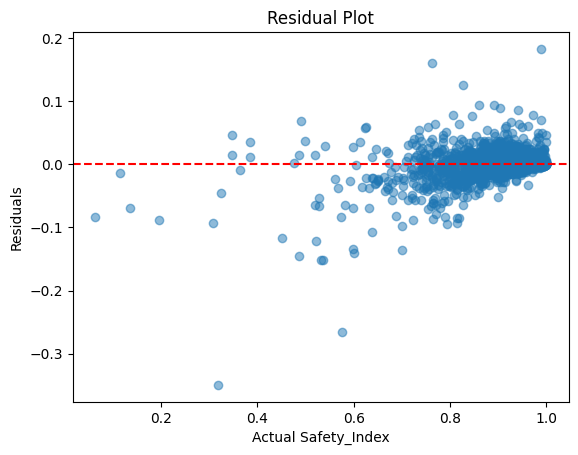

In [662]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Safety_Index")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

## PREDICTION

In [663]:
state_mapping = dict(zip(state_encoder.classes_, range(len(state_encoder.classes_))))
print("State Encoding Mapping:")
print(state_mapping)

# Mapping of districts
district_mapping = dict(zip(district_encoder.classes_, range(len(district_encoder.classes_))))
print("\nDistrict Encoding Mapping:")
print(district_mapping)

State Encoding Mapping:
{'andamanandnicobarislands': 0, 'andhrapradesh': 1, 'arunachalpradesh': 2, 'assam': 3, 'bihar': 4, 'chandigarh': 5, 'chhattisgarh': 6, 'dadraandnagarhaveli': 7, 'damananddiu': 8, 'delhi': 9, 'goa': 10, 'gujarat': 11, 'haryana': 12, 'himachalpradesh': 13, 'jammuandkashmir': 14, 'jharkhand': 15, 'karnataka': 16, 'kerala': 17, 'lakshadweep': 18, 'madhyapradesh': 19, 'maharashtra': 20, 'manipur': 21, 'meghalaya': 22, 'mizoram': 23, 'nagaland': 24, 'odisha': 25, 'puducherry': 26, 'punjab': 27, 'rajasthan': 28, 'sikkim': 29, 'tamilnadu': 30, 'tripura': 31, 'uttarakhand': 32, 'uttarpradesh': 33, 'westbengal': 34}

District Encoding Mapping:
{'24parganasnorth': 0, '24parganassouth': 1, 'aandnislands': 2, 'adilabad': 3, 'agra': 4, 'ahmedabadcommr': 5, 'ahmedabadrural': 6, 'ahmednagar': 7, 'ahwadang': 8, 'aizawl': 9, 'ajmer': 10, 'akola': 11, 'alapuzha': 12, 'aligarh': 13, 'alirajpur': 14, 'allahabad': 15, 'almora': 16, 'alwar': 17, 'ambala': 18, 'ambalarural': 19, 'ambal

In [664]:
import pandas as pd

# Create DataFrame for state and district mappings
state_mapping_df = pd.DataFrame(list(state_mapping.items()), columns=['State', 'Encoded_Value'])
district_mapping_df = pd.DataFrame(list(district_mapping.items()), columns=['District', 'Encoded_Value'])

# Save to CSV files
state_mapping_df.to_csv('dataset/state_mapping.csv', index=False)
district_mapping_df.to_csv('dataset/district_mapping.csv', index=False)

In [665]:
def predict_safety_index_using_mapping(state, district, year, state_mapping, district_mapping, model):
        
    state_encoded = state_mapping.get(state, -1)
    district_encoded = district_mapping.get(district, -1)
    print(state_encoded,district_encoded)
    result=model.predict([[state_encoded, district_encoded, year]])
    return result

In [666]:
predict_safety_index_using_mapping('delhi','shahdara', 2012, state_mapping, district_mapping, model)

9 658


C:\Users\Palak Bansal\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.74074751])

In [667]:
state = "delhi"
district = "central"
year = 2025

In [668]:
# List of all districts in Delhi
delhi_districts = [
    'central', 'newdelhi', 'south', 'southeast', 'west', 'north', 
    'northwest', 'east', 'shahdara', 'northeast', 'southwest'
]

year = 2024

for district in delhi_districts:
    safety_index = predict_safety_index_using_mapping('delhi', district, year, state_mapping, district_mapping, model)
    print(f"Safety Index for {district.capitalize()} (Delhi) in {year}: {safety_index}")

# nd,n,c,s,nw,sw,w,ne,e,se  predicted
# nd,s,c,se,w,n,nw,e,ne,sw  actual 

9 130
Safety Index for Central (Delhi) in 2024: [0.88325557]
9 536
Safety Index for Newdelhi (Delhi) in 2024: [0.96302413]
9 699
Safety Index for South (Delhi) in 2024: [0.7954344]
9 -1
Safety Index for Southeast (Delhi) in 2024: [0.47692536]
9 790
Safety Index for West (Delhi) in 2024: [0.75390152]
9 540
Safety Index for North (Delhi) in 2024: [0.90596188]
9 -1
Safety Index for Northwest (Delhi) in 2024: [0.47692536]
9 219
Safety Index for East (Delhi) in 2024: [0.7679707]
9 658
Safety Index for Shahdara (Delhi) in 2024: [0.74074751]
9 -1
Safety Index for Northeast (Delhi) in 2024: [0.47692536]
9 -1
Safety Index for Southwest (Delhi) in 2024: [0.47692536]


C:\Users\Palak Bansal\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Palak Bansal\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Palak Bansal\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Palak Bansal\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Palak Bansal\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Rand

## SAVING THE MODEL

In [669]:
joblib.dump(model, 'model.pkl')

['model.pkl']

In [670]:
sr_model=joblib.load('model.pkl')
sr_model.predict([[1, 3, 2012]])

C:\Users\Palak Bansal\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.74519495])